# This is the test code for red/green totem detector

import dependencies

In [1]:
import numpy as np
import cv2
import copy
from matplotlib import pyplot as plt

/home/nctuece/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


show input image (captured from real world)

In [2]:
img = cv2.imread('tutorial_data/red_green_totem3.jpg')

Remember that opencv stores rgb image in reverse order

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

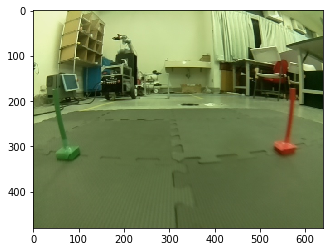

In [4]:
plt.imshow(img)
plt.show()

Now that we've got the input image, lets do change the colorspace to HSV and apply color filtering

change colorspace from RGB to HSV

In [5]:
hsvimg = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

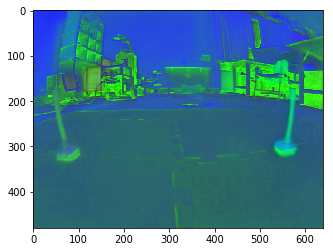

In [6]:
plt.imshow(hsvimg)
plt.show()

Color filtering

Let's do the green one first

In [7]:
GreenHSVlow = np.array([45,110,80], dtype=np.uint8)
GreenHSVhigh = np.array([60,200,200], dtype=np.uint8)

In [8]:
green_threshed = cv2.inRange(hsvimg, GreenHSVlow, GreenHSVhigh)

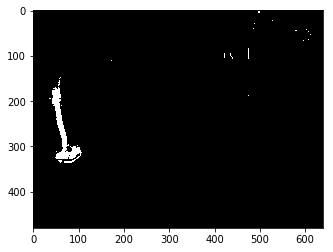

In [9]:
plt.imshow(green_threshed, cmap = 'gray')
plt.show()

lets do the red one

In [10]:
RedHSVlow = np.array([0,100,100], dtype=np.uint8)
RedHSVhigh = np.array([20,255,255], dtype=np.uint8)

In [11]:
red_threshed = cv2.inRange(hsvimg, RedHSVlow, RedHSVhigh)

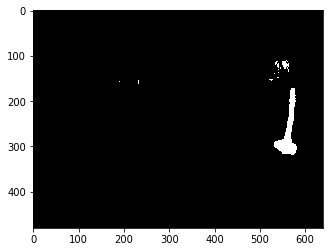

In [12]:
plt.imshow(red_threshed, cmap = 'gray')
plt.show()

Use morphological transformation(erosion/dilation) to get rid of noise

In [13]:
kernel = np.ones((3,3),np.uint8)
green_erosion = cv2.erode(green_threshed,kernel,iterations = 1)
red_erosion = cv2.erode(red_threshed,kernel,iterations = 1)

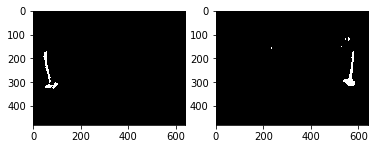

In [14]:
plt.subplot(121),plt.imshow(green_erosion, cmap = 'gray')
plt.subplot(122),plt.imshow(red_erosion, cmap = 'gray')
plt.show()

In [15]:
kernel = np.ones((5,5),np.uint8)
green_dilation = cv2.dilate(green_erosion,kernel,iterations = 2)
red_dilation = cv2.dilate(red_erosion,kernel,iterations = 2)

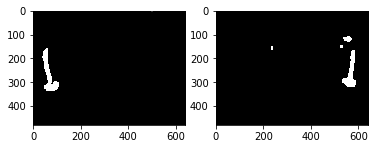

In [16]:
plt.subplot(121),plt.imshow(green_dilation, cmap = 'gray')
plt.subplot(122),plt.imshow(red_dilation, cmap = 'gray')
plt.show()

find contours

In [17]:
_,green_contours,green_hierarchy = cv2.findContours(green_dilation, 1, 2)
_,red_contours,red_hierarchy = cv2.findContours(red_dilation, 1, 2)

In [18]:
tmp = copy.copy(img)

In [19]:
_ = cv2.drawContours(tmp, green_contours, -1, (0,255,0), 3)
_ = cv2.drawContours(tmp, red_contours, -1, (255,0,0), 3)

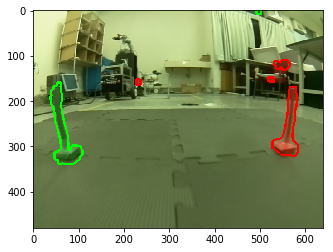

In [20]:
plt.imshow(tmp)
plt.show()

find largest contour(if multiply contours are detected)

In [21]:
largest_green_area = 500
largest_red_area = 500
largest_green_index = 0
largest_red_index = 0
for index in range(len(green_contours)):
    cnt = green_contours[index]
    area = cv2.contourArea(cnt)
    if area > largest_green_area:
        #print index, area
        largest_green_area = area
        largest_green_index = index
for index in range(len(red_contours)):
    cnt = red_contours[index]
    area = cv2.contourArea(cnt)
    if area > largest_red_area:
        #print index, area
        largest_red_area = area 
        largest_red_index = index
#print largest_green_index, largest_red_index
green_totem_contour = green_contours[largest_green_index]
red_totem_contour = red_contours[largest_red_index]

find center of gravity of the target contour

In [22]:
green_M = cv2.moments(green_totem_contour)
red_M = cv2.moments(red_totem_contour)

green_cx = int(green_M['m10']/green_M['m00'])
green_cy = int(green_M['m01']/green_M['m00'])

red_cx = int(red_M['m10']/red_M['m00'])
red_cy = int(red_M['m01']/red_M['m00'])

draw circle on the target(totem)

In [23]:
output_img = copy.copy(img)

In [24]:
_ = cv2.circle(output_img,(green_cx, green_cy),5,(0,255,0),2)
_ = cv2.circle(output_img,(red_cx, red_cy),5,(255,0,0),2)

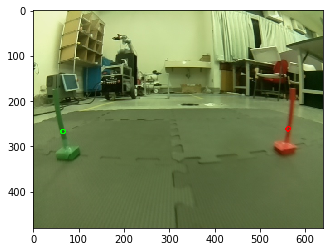

In [25]:
plt.imshow(output_img)
plt.show()

find center of the two totems

In [26]:
_ = cv2.circle(output_img,((green_cx+red_cx)/2, (green_cy+red_cy)/2),8,(0,255,255),-1)

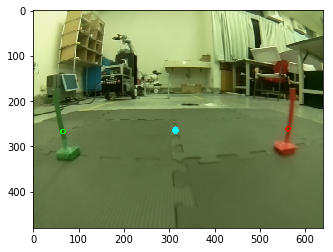

In [27]:
plt.imshow(output_img)
plt.show()

NOTE: please test multiple images to make sure the detector work on several cases